# Principal Coordinates Analysis (PCoA)

load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio.stats.distance import anosim

In [3]:
md = pd.read_csv('../../metadata.tsv', sep = '\t')

In [5]:
ft = pd.read_csv('../../featuretable.csv', sep = ',')

In [7]:
ft.index = ft['row ID']

In [8]:
ft = ft.drop(['row ID','row m/z','row retention time', 'Unnamed: 210'], axis=1)

In [9]:
ft.columns = ft.columns.str.replace(' filtered Peak area','')

In [10]:
blanks = ft.filter(regex='H20').mean(axis = 1) 

In [11]:
blanks.head()

row ID
1         0.000000
2         0.000000
3      3029.683564
4         0.000000
5    415751.400533
dtype: float64

In [12]:
for index, row in ft.iterrows():
    ft.loc[index][ft.loc[index] < (20*blanks[index])] = 0

In [13]:
ft = ft[ft.columns.drop(list(ft.filter(regex='H20|Pool')))]

In [15]:
ft = ft.loc[(ft != 0).any(axis=1)]

In [16]:
ft.shape

(6053, 148)

In [17]:
ft.to_csv("featuretable_blankfiltered.tsv",sep='\t',index=True)

In [18]:
len(ft.T.values)

148

In [19]:
ids = list(ft.columns)

In [20]:
data = ft.T.values

In [21]:
bc_dm = beta_diversity("braycurtis", data, ids)

In [22]:
len(ids)

148

In [23]:
len(data)

148

In [24]:
pcoa_dm = pcoa(bc_dm)

/Users/madeleineernst/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.032767171056709454 and the largest is 1.1092612425479789.
  RuntimeWarning


In [25]:
df = pcoa_dm.samples

In [27]:
df['filename'] = df.index

In [28]:
df_md = df.merge(
    md,
    left_on=['filename'],
    right_on=['filename'],
    how='left'
)

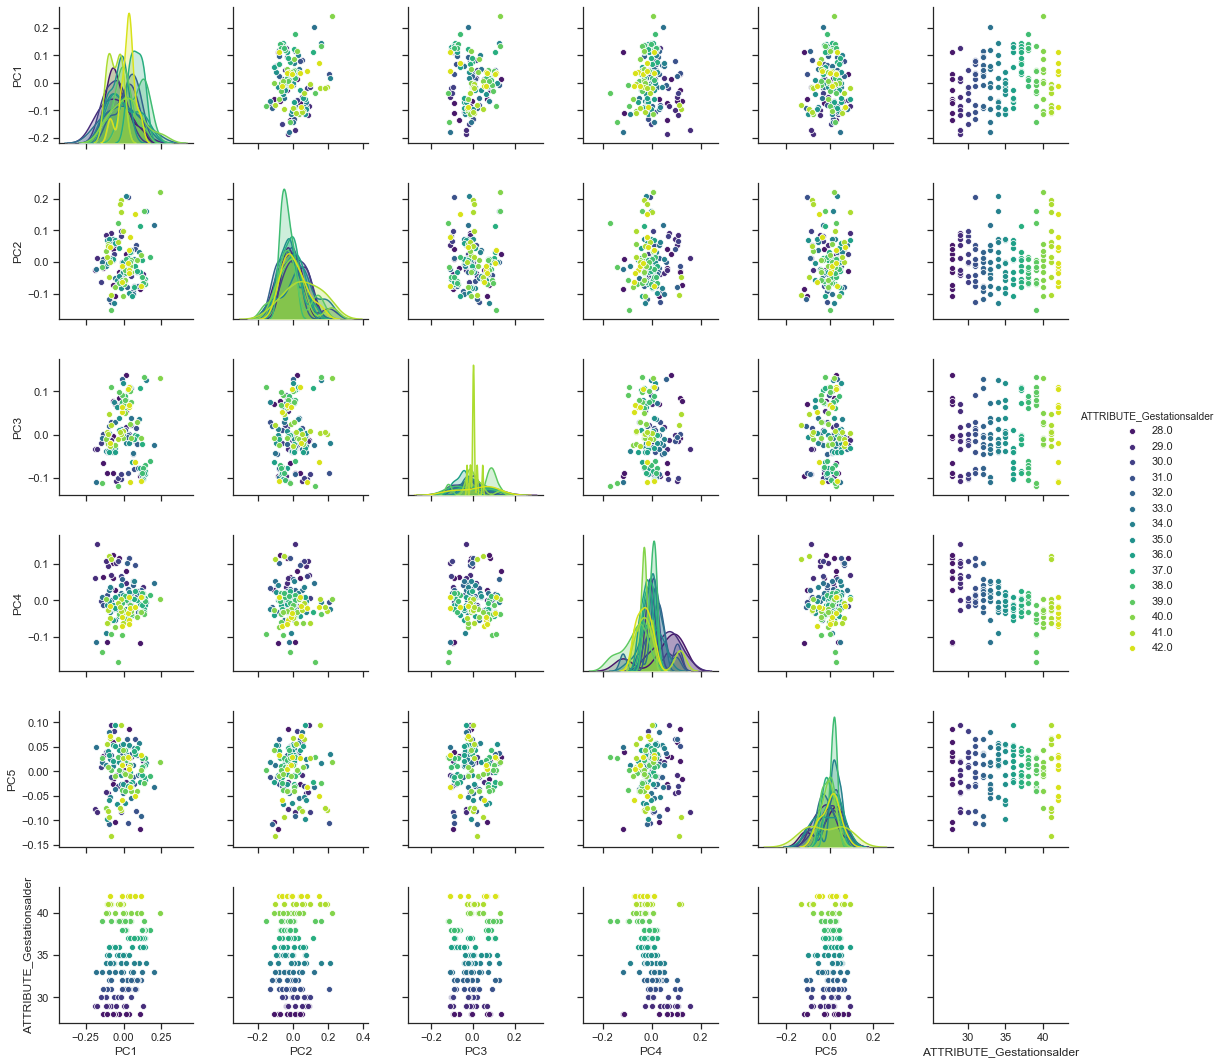

In [30]:
sns.pairplot(df_md[['PC1','PC2','PC3','PC4', 'PC5', 'ATTRIBUTE_Gestationsalder']],hue="ATTRIBUTE_Gestationsalder", palette = 'viridis')

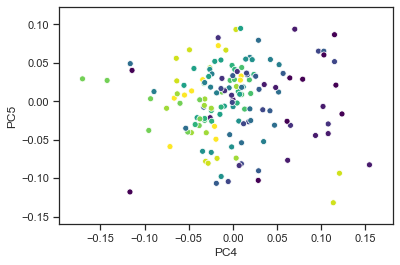

In [31]:
sns_plot = sns.scatterplot(x="PC4", y="PC5", hue="ATTRIBUTE_Gestationsalder",data=df_md, palette = 'viridis', legend= False)
fig = sns_plot.get_figure()
fig.savefig("GestationalAge_PC4and5.pdf")

In [32]:
perm = permanova(bc_dm, df_md['ATTRIBUTE_Gestationsalder'], column=None, permutations=999)

In [33]:
anos = anosim(bc_dm, df_md['ATTRIBUTE_Gestationsalder'], column=None, permutations=999)

In [34]:
perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     148
number of groups                 15
test statistic              2.04959
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

In [35]:
anos

method name                 ANOSIM
test statistic name              R
sample size                    148
number of groups                15
test statistic            0.154109
p-value                      0.001
number of permutations         999
Name: ANOSIM results, dtype: object